In [2]:
%pylab inline
import pickle
import os.path

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [94]:
base_dir = '/home/mcoving/ChampOutputs/flow-comparison/'
color_dict = {
    'GVF':'tab:blue', 'Normal':'tab:orange', 'Original':'tab:green',
    'GVF-high':'tab:blue', 'Normal-high':'tab:orange', 'Original-high':'tab:green'
             }

def load_sims(snapshot, 
              dirs=['gvf-figs', 'norm-figs', 'orig-figs'],
              names=['GVF', 'Normal', 'Original']):
    timestep_str = "%08d" % (snapshot)
    snapfilename = 'snapshot-' + timestep_str + '.pkl'
    simdir = {}
    for i, dir in enumerate(dirs):
        try:
            snapfile = open(os.path.join(base_dir, dir, snapfilename), 'rb')
            sim = pickle.load(snapfile)
            snapfile.close()
            simdir[names[i]] = sim
        except OSError as e:
            print('No such snapshot file.')
    return simdir


def plot_sim_profiles(sims):
    legend_list = []
    
  
    for sim_name in sims.keys():
        sim = sims[sim_name]
        x = sim.x_arr
        plot(x, sim.z_arr, color=color_dict[sim_name])
        legend_list.append('Z '+ sim_name)
        plot(x, sim.h, '--', color=color_dict[sim_name])
        legend_list.append('h '+ sim_name)
     
    legend(legend_list)
    xlabel('X position (m)')
    ylabel('Elevation (m)')
    tight_layout()

def plot_sim_width(sims):
    legend_list = []    
    for sim_name in sims.keys():
        sim = sims[sim_name]
        x = sim.x_arr
        if len(x) > len(sim.W):
            x = x[1:]
        plot(x, sim.W, color=color_dict[sim_name])
        legend_list.append(sim_name)
  
    legend(legend_list)
    xlabel('X position (m)')
    ylabel('Channel Width (m)')
    tight_layout()    


def plot_sim_slope(sims):
    legend_list = []
    for sim_name in sims.keys():
        sim = sims[sim_name]
        x = sim.x_arr
#        if len(x) > len(sim.slopes):
#            x = x[1:]
        semilogy(x[1:], sim.slopes, color=color_dict[sim_name])
        legend_list.append(sim_name)
  
    legend(legend_list)
    xlabel('X position (m)')
    ylabel('Bed Slope')
    tight_layout()    
    

In [95]:
ioff()
for i in arange(1,201):
    snapnum = i*1000
    sims = load_sims(snapnum,
                     dirs=['gvf-figs', 'norm-figs', 'orig-figs',
                           'gvf-n150-figs', 'norm-n150-figs', 'orig-n150-figs'],
                     names=['GVF', 'Normal', 'Original',
                           'GVF-high', 'Normal-high', 'Original-high'])
    figure(figsize=(6,12))
    subplot(311)
    plot_sim_profiles(sims)
    subplot(312)
    plot_sim_width(sims)
    ylim([0, 5.5])
    subplot(313)
    plot_sim_slope(sims)
    ylim([5e-6, 2e-1])
    timestep_str = "%08d" % (snapnum)
    figpath = os.path.join(base_dir, 'multires-comp-figs', 'Profile-width-comparison-'+timestep_str+'.jpg')
    savefig(figpath)
    close()


No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such sna

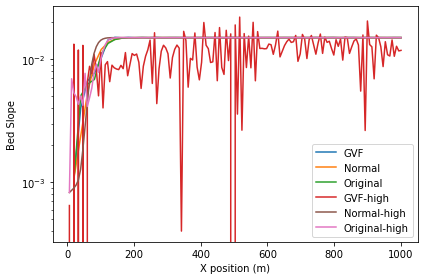

In [92]:
plot_sim_slope(sims_multires)

        

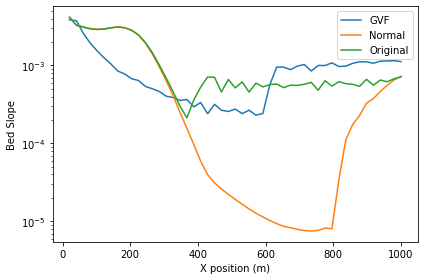

In [82]:
sims = load_sims(25000)
#plot_sim_width(sims)
plot_sim_slope(sims)


(-2.0, 1.0)

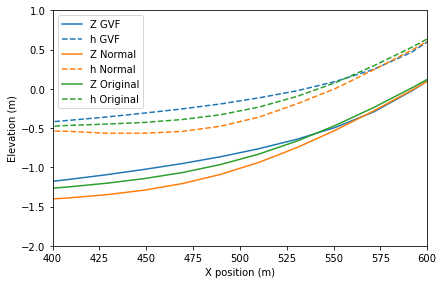

In [68]:
sims = load_sims(8000)
plot_sim_profiles(sims)
xlim([400,600])
ylim([-2,1])

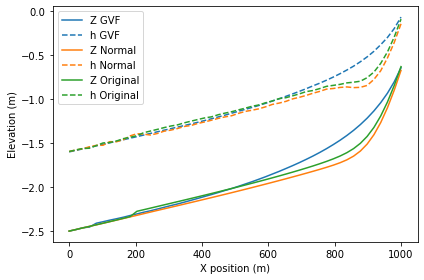

In [41]:
sims = load_sims(15000)
plot_sim_profiles(sims)


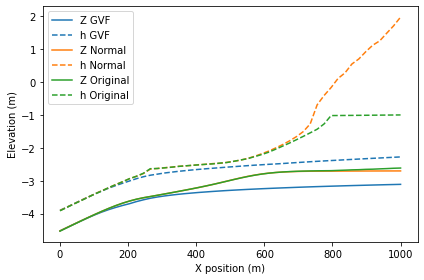

In [48]:
sims = load_sims(35000)
plot_sim_profiles(sims)

In [85]:
ioff()
for i in arange(1,201):
    snapnum = i*1000
    sims = load_sims(snapnum)
    figure(figsize=(6,12))
    subplot(311)
    plot_sim_profiles(sims)
    subplot(312)
    plot_sim_width(sims)
    ylim([0, 5.5])
    subplot(313)
    plot_sim_slope(sims)
    ylim([5e-6, 2e-1])
    timestep_str = "%08d" % (snapnum)
    figpath = os.path.join(base_dir, 'comp-figs', 'Profile-width-comparison-'+timestep_str+'.jpg')
    savefig(figpath)
    close()

No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such snapshot file.
No such sna

Notes: solvers seem to give quite similar results. Biggest differences occur during incision from weak into strong layer. Normal flow and original solver build up steeper knick near bottom as well as deep flow zone in flat spot above knick. Interplay between width and slope produces an oscillation for the normal and original solvers that is not present in GVF solver.

In [88]:
size(5)

1

Next step. Look at simulations with changing uplift. Need to edit runSim to enable passing a list of uplifts and associating switching times.